In [62]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_curve, auc
# Import specific models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [45]:
# Load the necessary CSV files
df_opel_corsa_01 = pd.read_csv('D:\College\Year 4\GestureBasedUi\datasets\opel_corsa_01.csv', delimiter=';', decimal=',')
df_opel_corsa_02 = pd.read_csv('D:\College\Year 4\GestureBasedUi\datasets\opel_corsa_02.csv', delimiter=';', decimal=',')
df_peugeot_207_01 = pd.read_csv('D:\College\Year 4\GestureBasedUi\datasets\peugeot_207_01.csv', delimiter=';', decimal=',')
df_peugeot_207_02 = pd.read_csv('D:\College\Year 4\GestureBasedUi\datasets\peugeot_207_02.csv', delimiter=';', decimal=',')

In [46]:
# Combine datasets
df_combined = pd.concat([df_opel_corsa_01, df_opel_corsa_02, df_peugeot_207_01, df_peugeot_207_02], ignore_index=True)

# Check and handle missing data
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy="most_frequent")

numeric_cols = ['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage', 'VehicleSpeedVariance',
                'VehicleSpeedVariation', 'LongitudinalAcceleration', 'EngineLoad', 'MassAirFlow', 'VerticalAcceleration', 
                'FuelConsumptionAverage']

categorical_cols = ['roadSurface', 'traffic']  # Add your categorical columns here

df_combined[numeric_cols] = imputer_num.fit_transform(df_combined[numeric_cols])
df_combined[categorical_cols] = imputer_cat.fit_transform(df_combined[categorical_cols])

# Encode categorical variables
le = LabelEncoder()
df_combined['drivingStyle'] = le.fit_transform(df_combined['drivingStyle'])

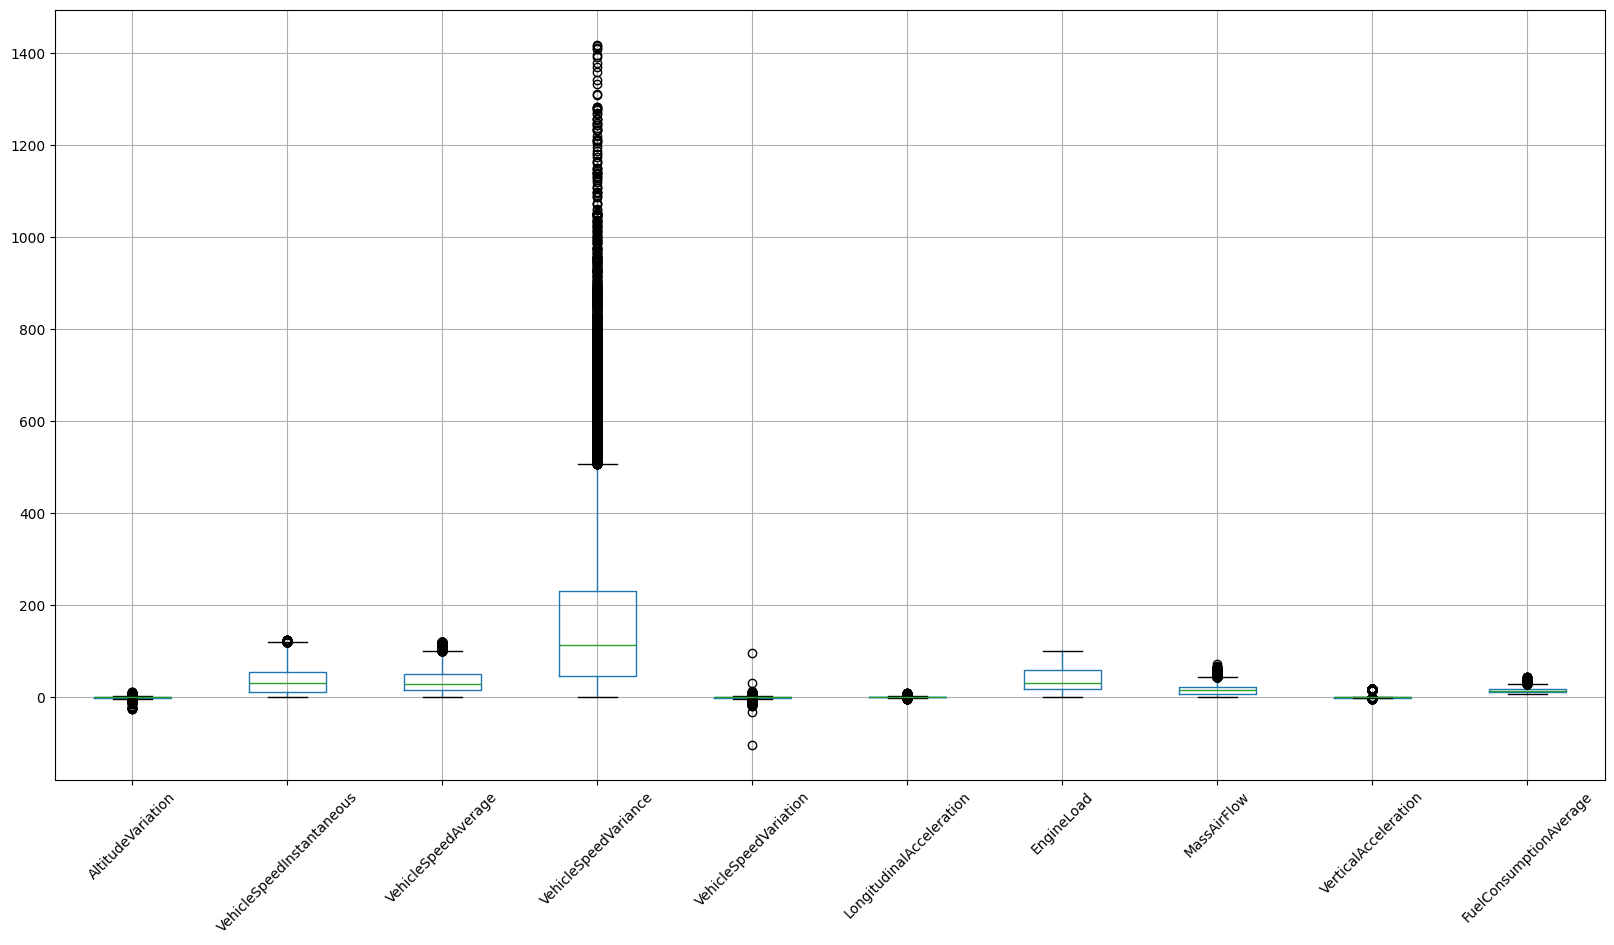

In [47]:
# Exploratory Data Analysis (EDA)
# Outlier detection with boxplot
df_combined[numeric_cols].boxplot(figsize=(20, 10))
plt.xticks(rotation=45)
plt.show()

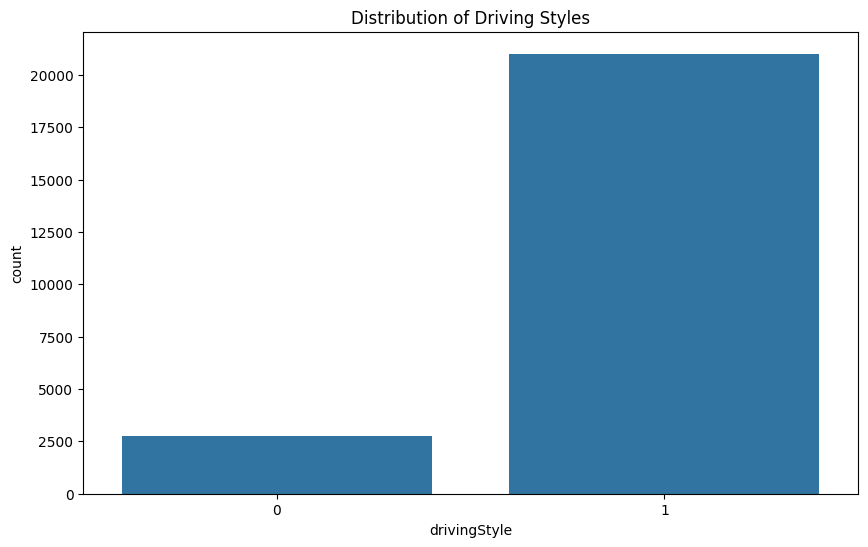

In [48]:
# Distribution of driving styles
plt.figure(figsize=(10, 6))
sns.countplot(x='drivingStyle', data=df_combined)
plt.title('Distribution of Driving Styles')
plt.show()

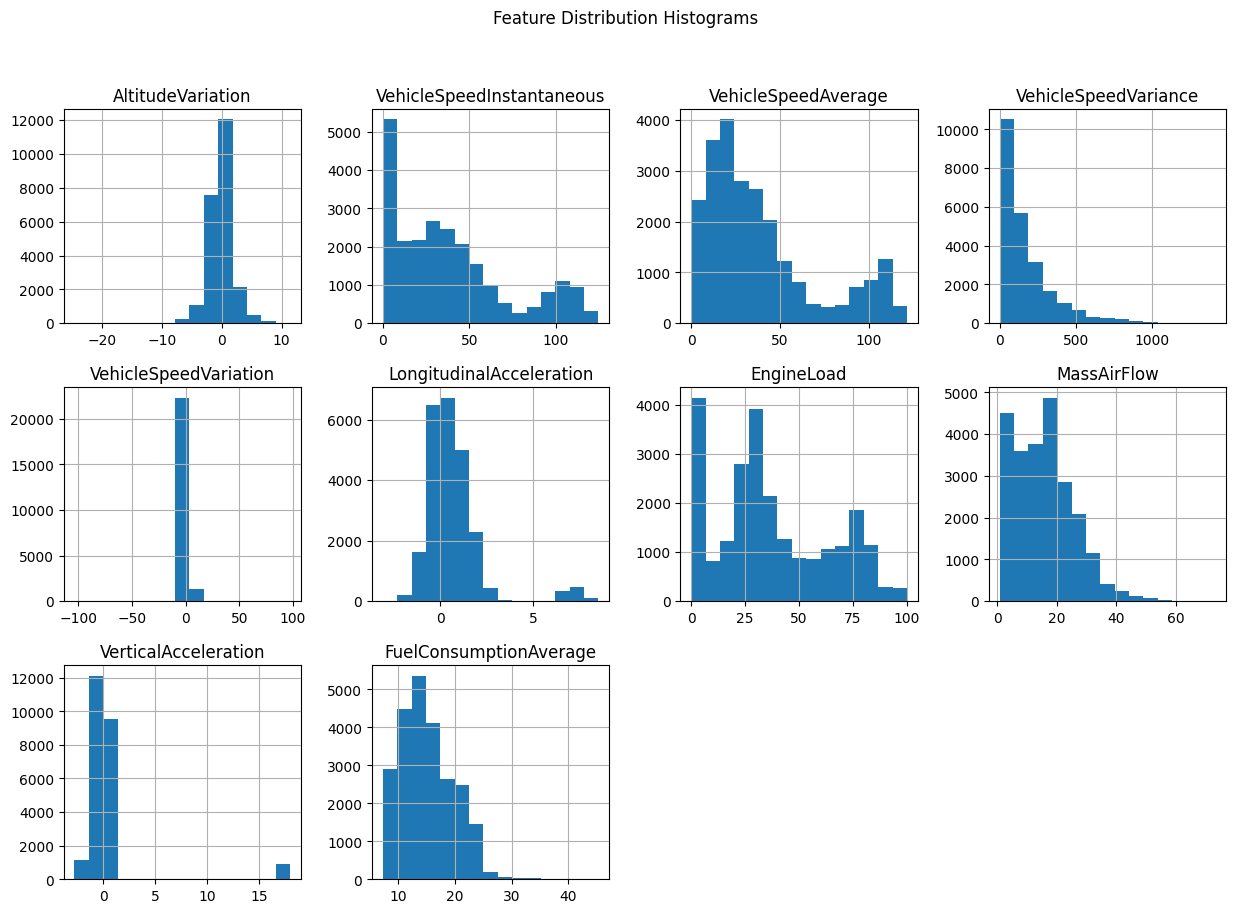

In [49]:
# Feature distribution histograms
df_combined[numeric_cols].hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Feature Distribution Histograms')
plt.show()

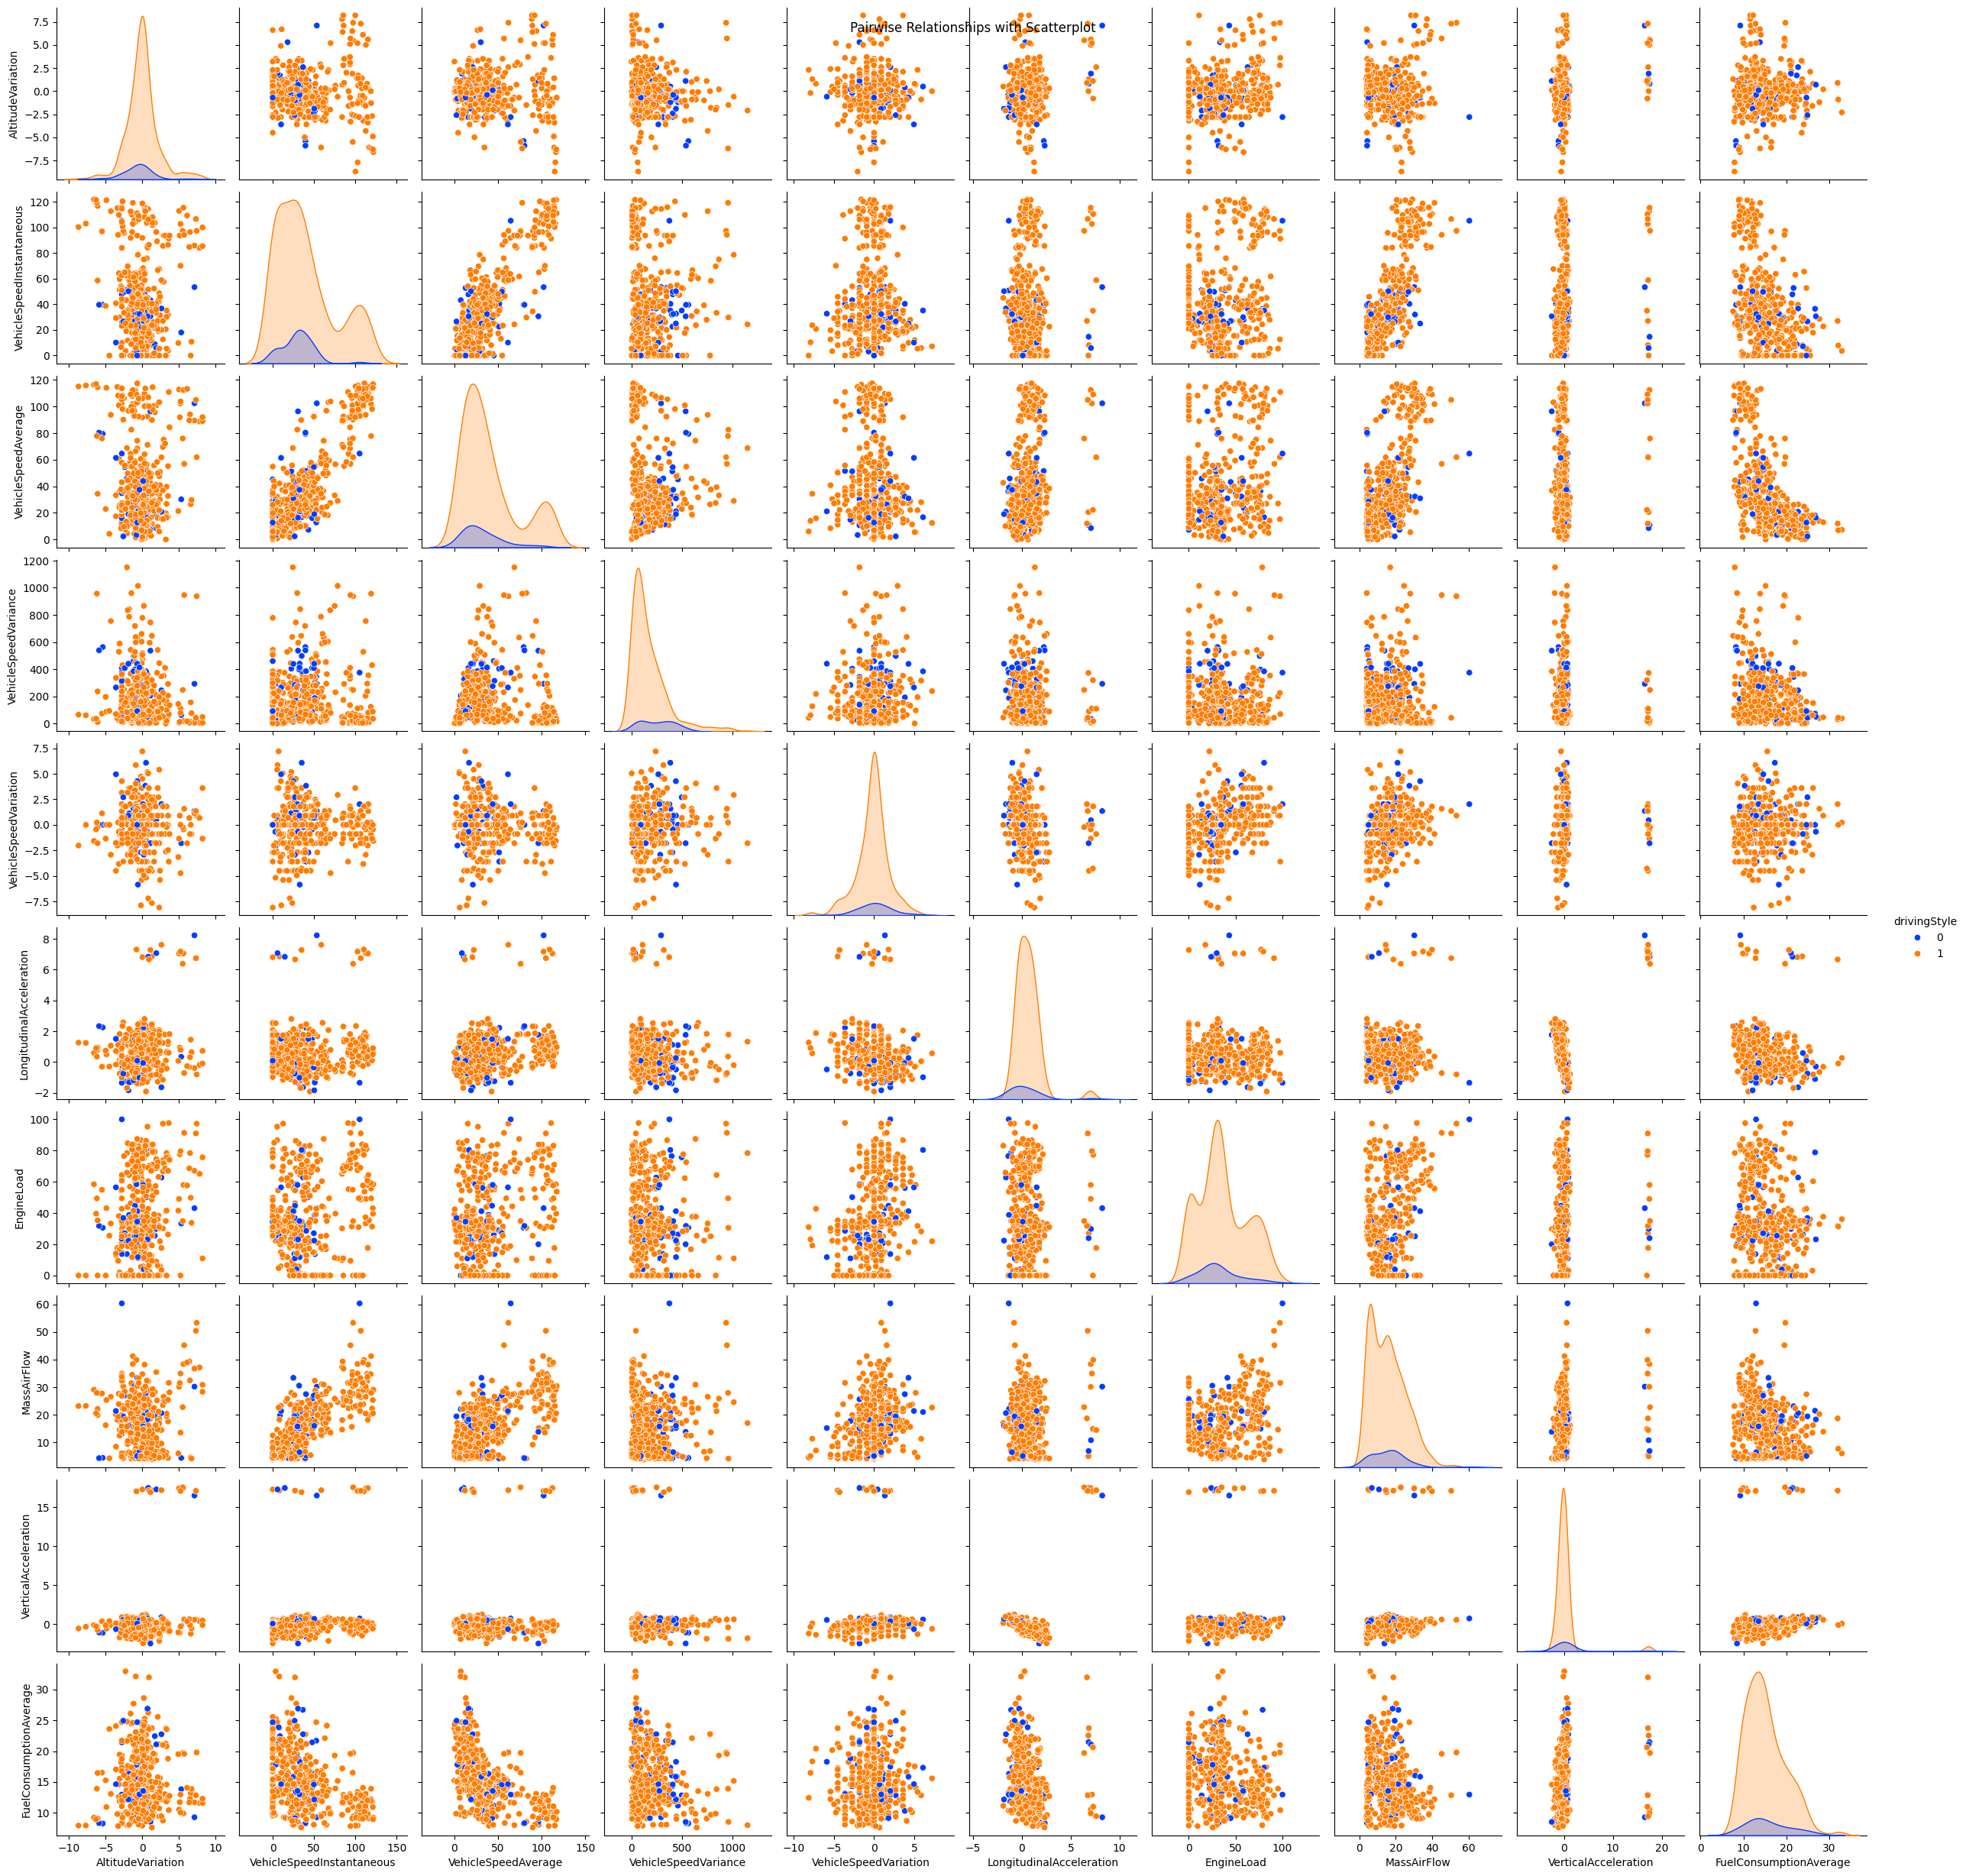

In [50]:

# Pairwise Relationships with Scatterplot (Sampled Data for Efficiency)
sampled_data = df_combined.sample(min(500, len(df_combined)))  
sns.pairplot(sampled_data, vars=numeric_cols, hue='drivingStyle', palette='bright')
plt.suptitle('Pairwise Relationships with Scatterplot')
plt.show()

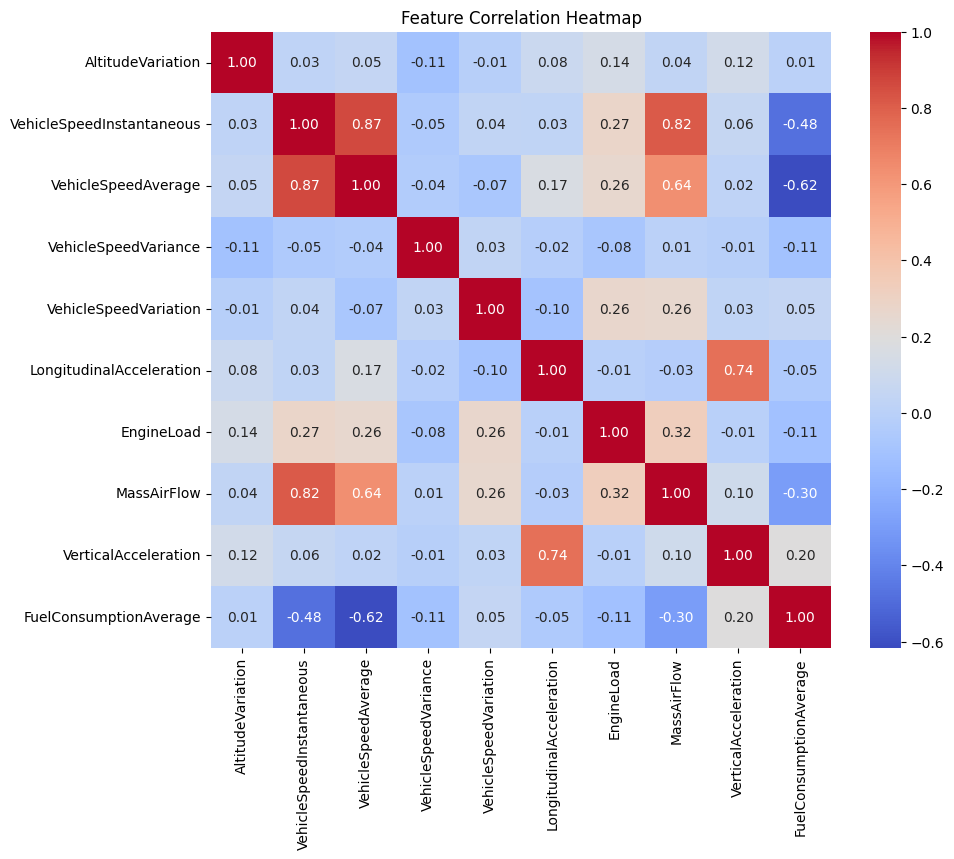

In [51]:
# Correlation Heatmap
corr = df_combined[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [52]:
X = df_combined.drop(['drivingStyle'], axis=1)  # Include all other features except the target
y = df_combined['drivingStyle']

# Encode categorical features as a one-hot numeric array
encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X[['roadSurface', 'traffic']]).toarray())
X_encoded.index = X.index

# Giving new columns appropriate names
encoded_columns = encoder.get_feature_names_out(['roadSurface', 'traffic'])
X_encoded.columns = encoded_columns

# Drop original categorical columns and concatenate encoded ones
X = X.drop(['roadSurface', 'traffic'], axis=1)
X = pd.concat([X, X_encoded], axis=1)

# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert all column names in X_train and X_test to strings to ensure consistency
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [63]:
# Model Training and Evaluation

# Logistic Regression

# Create an imputer instance
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

model = LogisticRegression()
model.fit(X_train_imputed, y_train)
lr_predictions = model.predict(X_test_imputed)

In [64]:
predictions = model.predict(X_test_imputed)
print(classification_report(y_test, predictions))
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

              precision    recall  f1-score   support

           0       0.48      0.05      0.10       538
           1       0.89      0.99      0.94      4217

    accuracy                           0.89      4755
   macro avg       0.68      0.52      0.52      4755
weighted avg       0.84      0.89      0.84      4755

Logistic Regression Accuracy: 0.8862250262881177


In [65]:
# Train an SVM model
svm_model = SVC(kernel='linear', class_weight='balanced', probability=True)  
svm_model.fit(X_train_imputed, y_train)
svm_predictions = svm_model.predict(X_test_imputed)
print(classification_report(y_test, svm_predictions, zero_division=0))
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

              precision    recall  f1-score   support

           0       0.23      0.79      0.36       538
           1       0.96      0.67      0.79      4217

    accuracy                           0.68      4755
   macro avg       0.60      0.73      0.57      4755
weighted avg       0.88      0.68      0.74      4755

SVM Accuracy: 0.6799158780231336


In [66]:
# Train a kNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_imputed, y_train)
knn_predictions = knn_model.predict(X_test_imputed)
print(classification_report(y_test, knn_predictions))
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("kNN Accuracy:", knn_accuracy)

              precision    recall  f1-score   support

           0       0.72      0.53      0.61       538
           1       0.94      0.97      0.96      4217

    accuracy                           0.92      4755
   macro avg       0.83      0.75      0.79      4755
weighted avg       0.92      0.92      0.92      4755

kNN Accuracy: 0.923869610935857


In [67]:
from sklearn.model_selection import cross_val_score

# Define the models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM', SVC(kernel='linear', class_weight='balanced', probability=True)),
    ('kNN', KNeighborsClassifier(n_neighbors=5))
]

# Iterate over models
for name, model in models:
    # Perform cross-validation
    scores = cross_val_score(model, X_train_imputed, y_train, cv=5)  # You can adjust the number of folds (cv parameter) as needed
    
    # Print the mean and standard deviation of scores
    print(f'{name} Cross-Validation Accuracy: {scores.mean():.4f} +/- {scores.std():.4f}')

Logistic Regression Cross-Validation Accuracy: 0.8818 +/- 0.0020
SVM Cross-Validation Accuracy: 0.6714 +/- 0.0072
kNN Cross-Validation Accuracy: 0.9207 +/- 0.0031


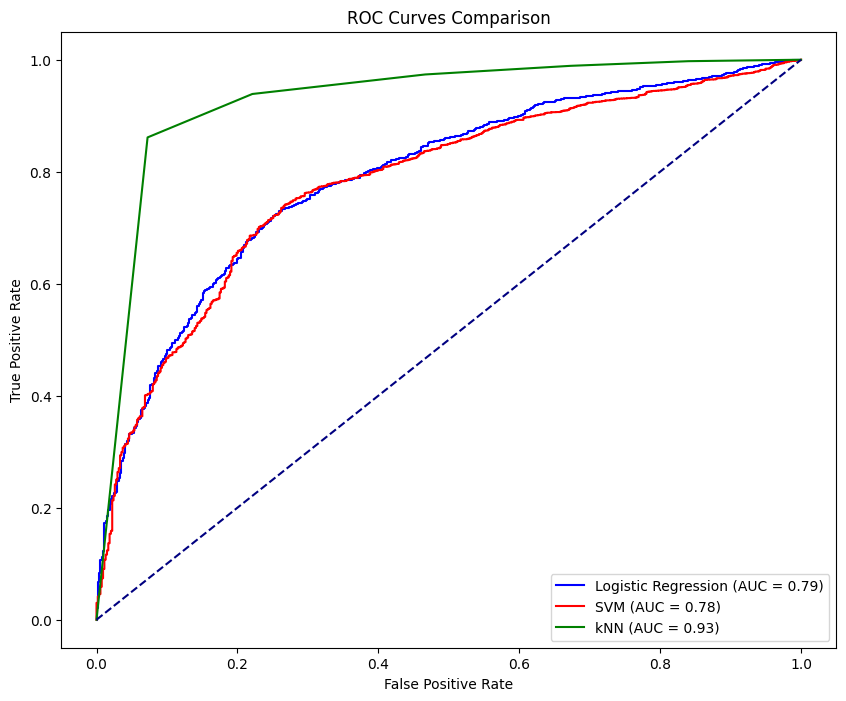

In [61]:
# For Logistic Regression
lr_probs = model.predict_proba(X_test_imputed)[:, 1]

svm_probs = svm_model.predict_proba(X_test_imputed)[:, 1]

# For kNN
knn_probs = knn_model.predict_proba(X_test_imputed)[:, 1]

def plot_roc_curve(y_true, model_probs, model_name, color):
    fpr, tpr, _ = roc_curve(y_true, model_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plotting
plt.figure(figsize=(10, 8))

plot_roc_curve(y_test, lr_probs, 'Logistic Regression', 'blue')
plot_roc_curve(y_test, svm_probs, 'SVM', 'red')
plot_roc_curve(y_test, knn_probs, 'kNN', 'green')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.show()